In [2]:
import torch
import torchvision
from torchvision import datasets, transforms

In [3]:
train = datasets.MNIST('', train= True, download = True ,transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST('', download = True, train = False, transform = transforms.Compose([transforms.ToTensor()]))

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 38449853.50it/s]


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1117147.86it/s]


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 8179598.46it/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3255387.69it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [4]:
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

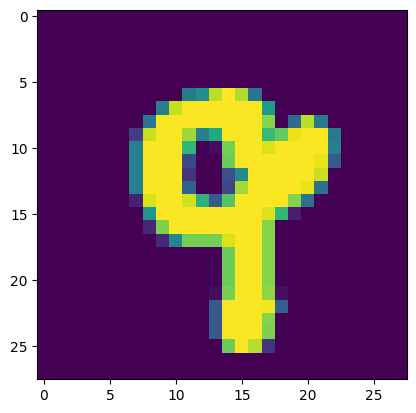

In [5]:
import matplotlib.pyplot as plt

for x, y in trainset:
    # Access the image only
    image = x[0]
    print (x)
    print (y)
    # print(image.shape)
    plt.imshow(image.view(28, 28))
    plt.show()
    break



In [6]:
import torch.nn as nn
import torch.nn.functional as F

In [7]:
class NET(nn.Module):
  def __init__(self):
    super().__init__()
    self.net1 = nn.Linear(28*28, 64)
    self.net2 = nn.Linear(64, 64)
    self.net3 = nn.Linear(64, 64)
    self.net4 = nn.Linear(64, 10)

  def forward(self,x):
    x = F.relu(self.net1(x))
    x = F.relu(self.net2(x))
    x = F.relu(self.net3(x))
    x = self.net4(x)
    return F.log_softmax(x, dim = 1)

net = NET()
print (net)

NET(
  (net1): Linear(in_features=784, out_features=64, bias=True)
  (net2): Linear(in_features=64, out_features=64, bias=True)
  (net3): Linear(in_features=64, out_features=64, bias=True)
  (net4): Linear(in_features=64, out_features=10, bias=True)
)


In [8]:
X = torch.rand((28, 28))
X = X.view(-1, 28*28)
X.shape


torch.Size([1, 784])

In [9]:
output = net(X)
output

tensor([[-2.3037, -2.1660, -2.2327, -2.3798, -2.3270, -2.3097, -2.2786, -2.2726,
         -2.3266, -2.4569]], grad_fn=<LogSoftmaxBackward0>)

In [11]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr= 0.001)

epochs = 3

for x, y in trainset:
  x = x.view(-1, 28*28)
  optimizer.zero_grad()
  output = net(x)
  loss = F.nll_loss(output, y)
  loss.backward()
  optimizer.step()
  print (loss)

Streaming output truncated to the last 5000 lines.
tensor(0.2653, grad_fn=<NllLossBackward0>)
tensor(0.2719, grad_fn=<NllLossBackward0>)
tensor(0.7105, grad_fn=<NllLossBackward0>)
tensor(0.7106, grad_fn=<NllLossBackward0>)
tensor(0.3240, grad_fn=<NllLossBackward0>)
tensor(0.4501, grad_fn=<NllLossBackward0>)
tensor(0.0927, grad_fn=<NllLossBackward0>)
tensor(0.6696, grad_fn=<NllLossBackward0>)
tensor(0.3561, grad_fn=<NllLossBackward0>)
tensor(1.0081, grad_fn=<NllLossBackward0>)
tensor(0.0995, grad_fn=<NllLossBackward0>)
tensor(0.0739, grad_fn=<NllLossBackward0>)
tensor(0.6747, grad_fn=<NllLossBackward0>)
tensor(0.0479, grad_fn=<NllLossBackward0>)
tensor(0.0715, grad_fn=<NllLossBackward0>)
tensor(0.1074, grad_fn=<NllLossBackward0>)
tensor(0.3914, grad_fn=<NllLossBackward0>)
tensor(0.1838, grad_fn=<NllLossBackward0>)
tensor(0.2559, grad_fn=<NllLossBackward0>)
tensor(0.4030, grad_fn=<NllLossBackward0>)
tensor(1.2375, grad_fn=<NllLossBackward0>)
tensor(0.0800, grad_fn=<NllLossBackward0>)
ten

In [14]:
correct = 0
total = 0

with torch.no_grad():
  for x,y in trainset:
    x = x.view(-1, 784)
    output = net(x)
    for idx, i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct += 1
      total += 1
print("Accuracy: ", round(correct/total, 3)*100)


Accuracy:  95.19999999999999
